<a href="https://colab.research.google.com/github/ghgh415263/Mal_dectection/blob/main/model_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/drive/MyDrive/Colab Notebooks/data/malimg_dataset.zip" -d "/content/dataset"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/dataset/Allaple.L/0651671ce760ffbee5e9433b80724f2f.png  
  inflating: /content/dataset/Allaple.L/06524ebf396548004410f99a4dde2e54.png  
  inflating: /content/dataset/Allaple.L/06524f125eece7a54370609287188980.png  
  inflating: /content/dataset/Allaple.L/0652f1f4bad2c5c928080bc90db86ed1.png  
  inflating: /content/dataset/Allaple.L/0654748b4cc3330deef95ab0af4041cf.png  
  inflating: /content/dataset/Allaple.L/06549b73968ac1fc1e8eb54dddb10833.png  
  inflating: /content/dataset/Allaple.L/065513aa17b61f57cf793703a725c015.png  
  inflating: /content/dataset/Allaple.L/06583d83c5278fac7cd20c015780c1d0.png  
  inflating: /content/dataset/Allaple.L/0658876855197e86e417ba8a84d298ec.png  
  inflating: /content/dataset/Allaple.L/06598930132128de200841974164a858.png  
  inflating: /content/dataset/Allaple.L/065a7e3f38d8cc3ca056b4f5fc272643.png  
  inflating: /content/dataset/Allaple.L/065d1f12c517c06d5a510c100c9b6ed6.png  
  inflating: /co

Found 9339 files belonging to 25 classes.
Using 280 files for validation.


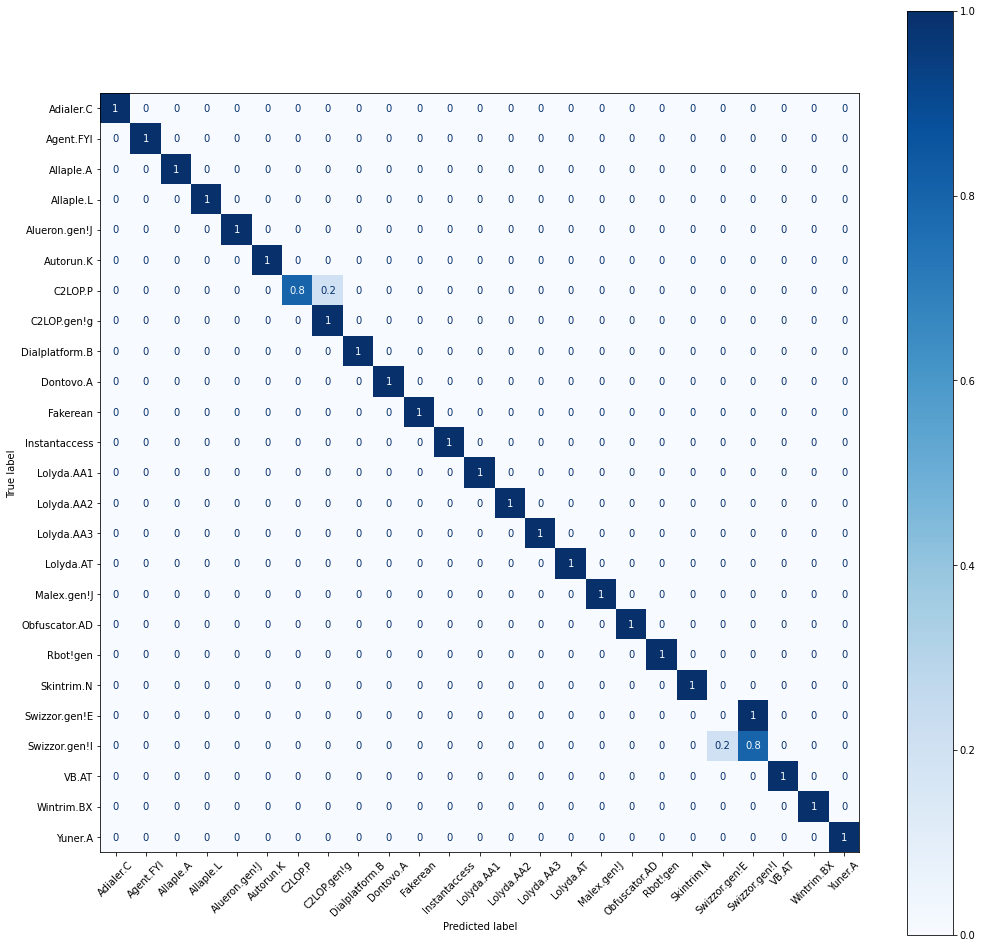

In [5]:
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.applications.vgg16 import VGG16

import pathlib

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

DATA_PATH = "/content/dataset"
batch_size = 64
img_height = 224
img_width = 224

data_dir = pathlib.Path(DATA_PATH)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.03,
  color_mode='rgb',
  interpolation='bilinear',
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_height,img_width,3))
base_model.trainable = False

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    base_model,
    layers.Flatten(),
    layers.Dense(25, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

latest = tf.train.latest_checkpoint("/content/drive/MyDrive/Colab_Notebooks/save/training-vgg16-1layer-bilinear")
model.load_weights(latest)


#평가를 위한 코드
y_test = np.array([])
y_pred = np.array([])

for x,y in val_ds:
  y_test = np.append(y_test, y.numpy(), axis=0)
  tmp = (model.predict(x)).argmax(axis=-1)
  y_pred = np.append(y_pred, tmp, axis=0)

cm = confusion_matrix(y_test, y_pred, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_ds.class_names)
fig, ax = plt.subplots(figsize=(17,17))

disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)
plt.show()